En el presente trabajo, se realizó el ensamblaje de *Lactiplantibacillus plantarum*, específicamente de la cepa 92117_i1 (BioSample # = SAMN32886979). 

In [ ]:
#Primero se descargó la secuencia desde e siguiente link https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR23493803&display=download
#Posteriormente se descomprimió y se copio desde el computador hacia apolo
%%bash
scp /Users/juliana/desktop/Lacto_SRR23493803.fastq jfrancoc@apolo.eafit.edu.co:/home/jfrancoc/slurm/Ensamblaje
#Se activa el ambiente conda creado previamente para trabajar
conda env list
conda activate kneumo_ensamble

Como ya todos los paquetes que se necesitarán están descargados en el ambiente (fastqc, trimmomatic y abyss), podemos proceder inmediatamente a chequear la calidad de la secuencia

In [ ]:
%%bash
fastqc Lacto_SRR23493803.fastq
#Esto genera un archivo .html, el cual es copiado a la consola del computador para poder ser abierto
scp jfrancoc@apolo.eafit.edu.co:/home/jfrancoc/slurm/Ensamblaje/Lacto_SRR23493803_fastqc.html .


Quality report of reads
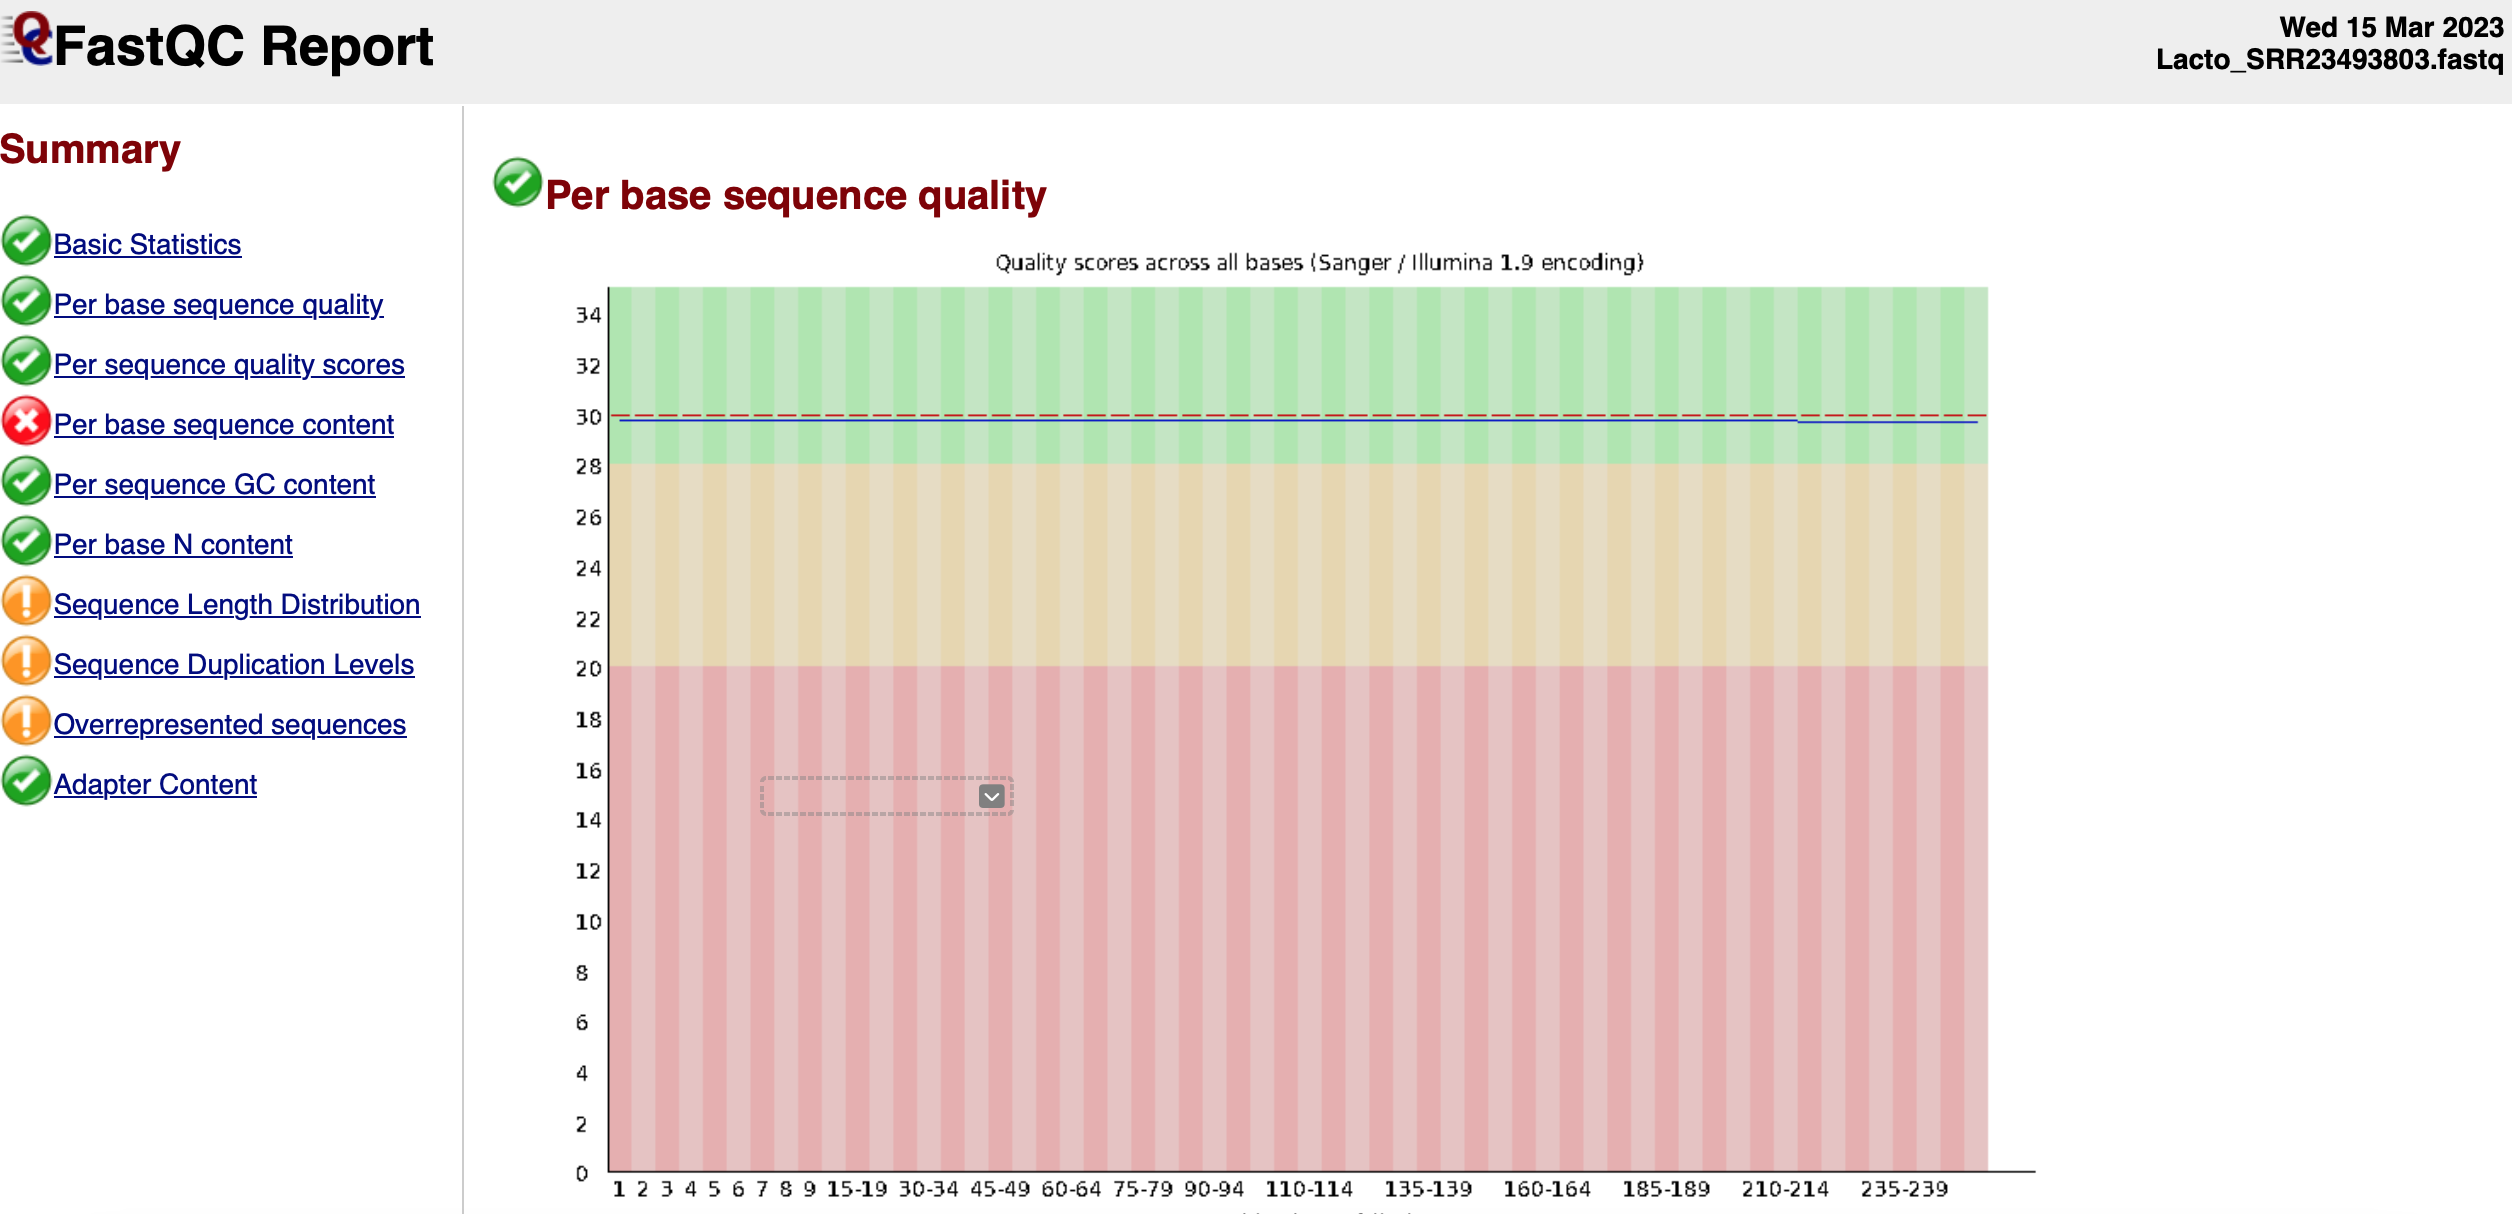

In [ ]:
#Para cortar las reads, no se utilizará MINLEN ya que la Sequence Lenght Distribution ya de por si está baja. 
trimmomatic SE -phred33 Lacto_SRR23493803.fastq lactotrimmed.fastq SLIDINGWINDOW:4:20
#Se chequea la calidad de este corte
fastqc lactotrimmed.fastq
#Se descarga el archivo
scp jfrancoc@apolo.eafit.edu.co:/home/jfrancoc/slurm/Ensamblaje/lactotrimmed_fastqc.html .

Quality of trimmed reads: 
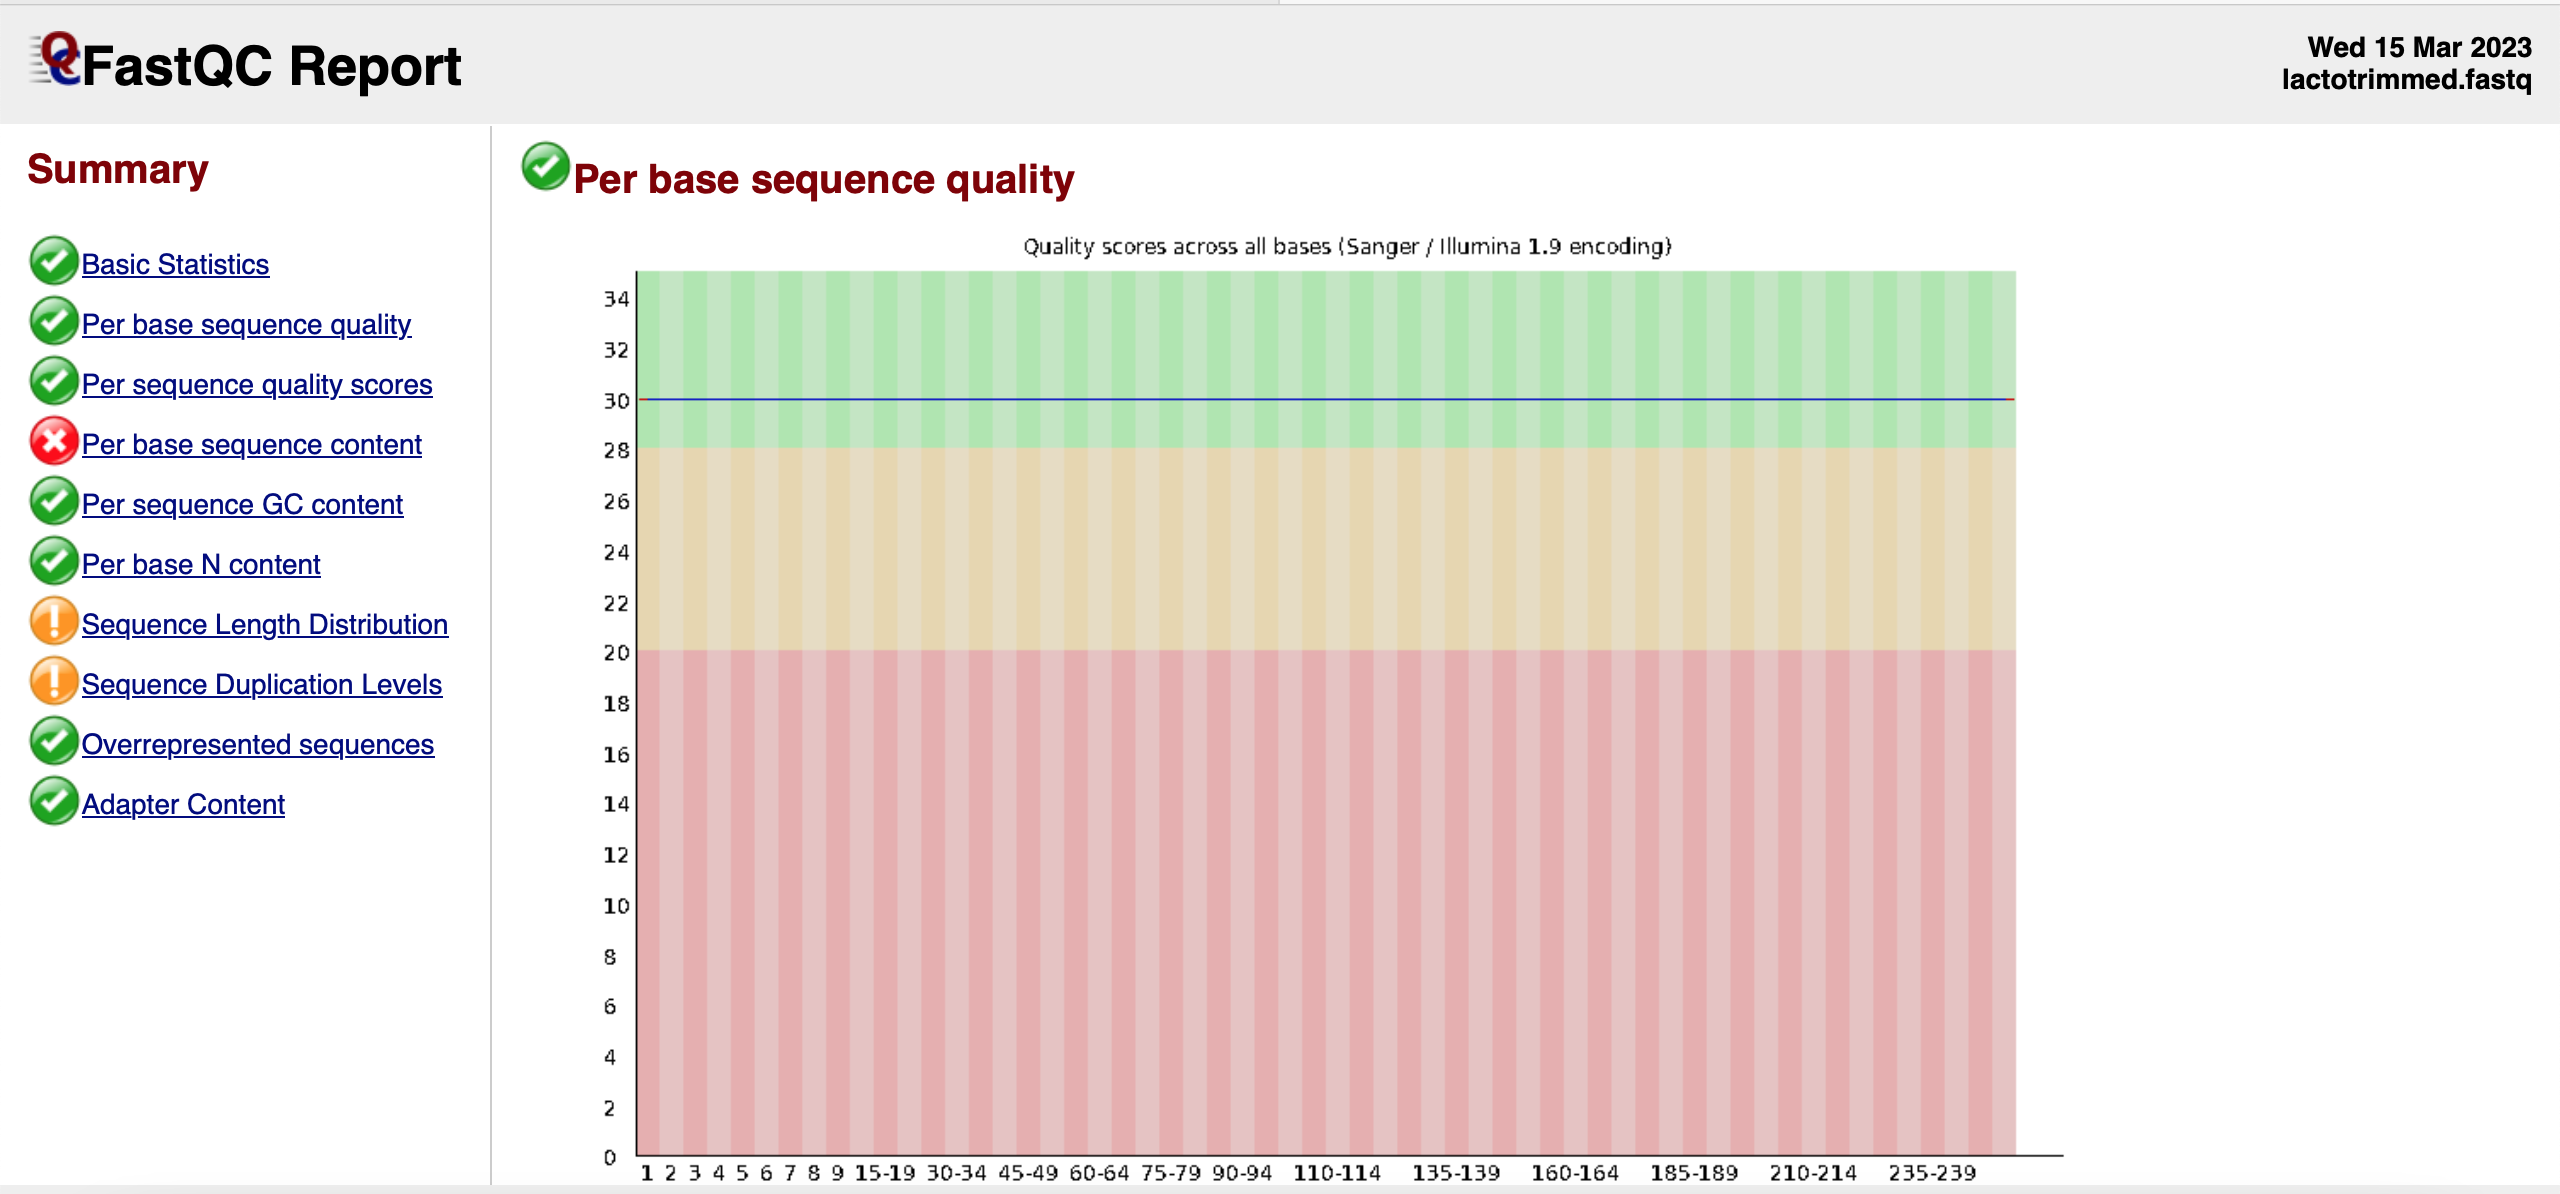

También se realizó con el MINLED = 25 para ver si cambiaba algo y estos fueron los resultados obtenidos de la calidad del corte,el cual es bastante similar (por no decir igual) al resultado obtenido sin MINLED: 
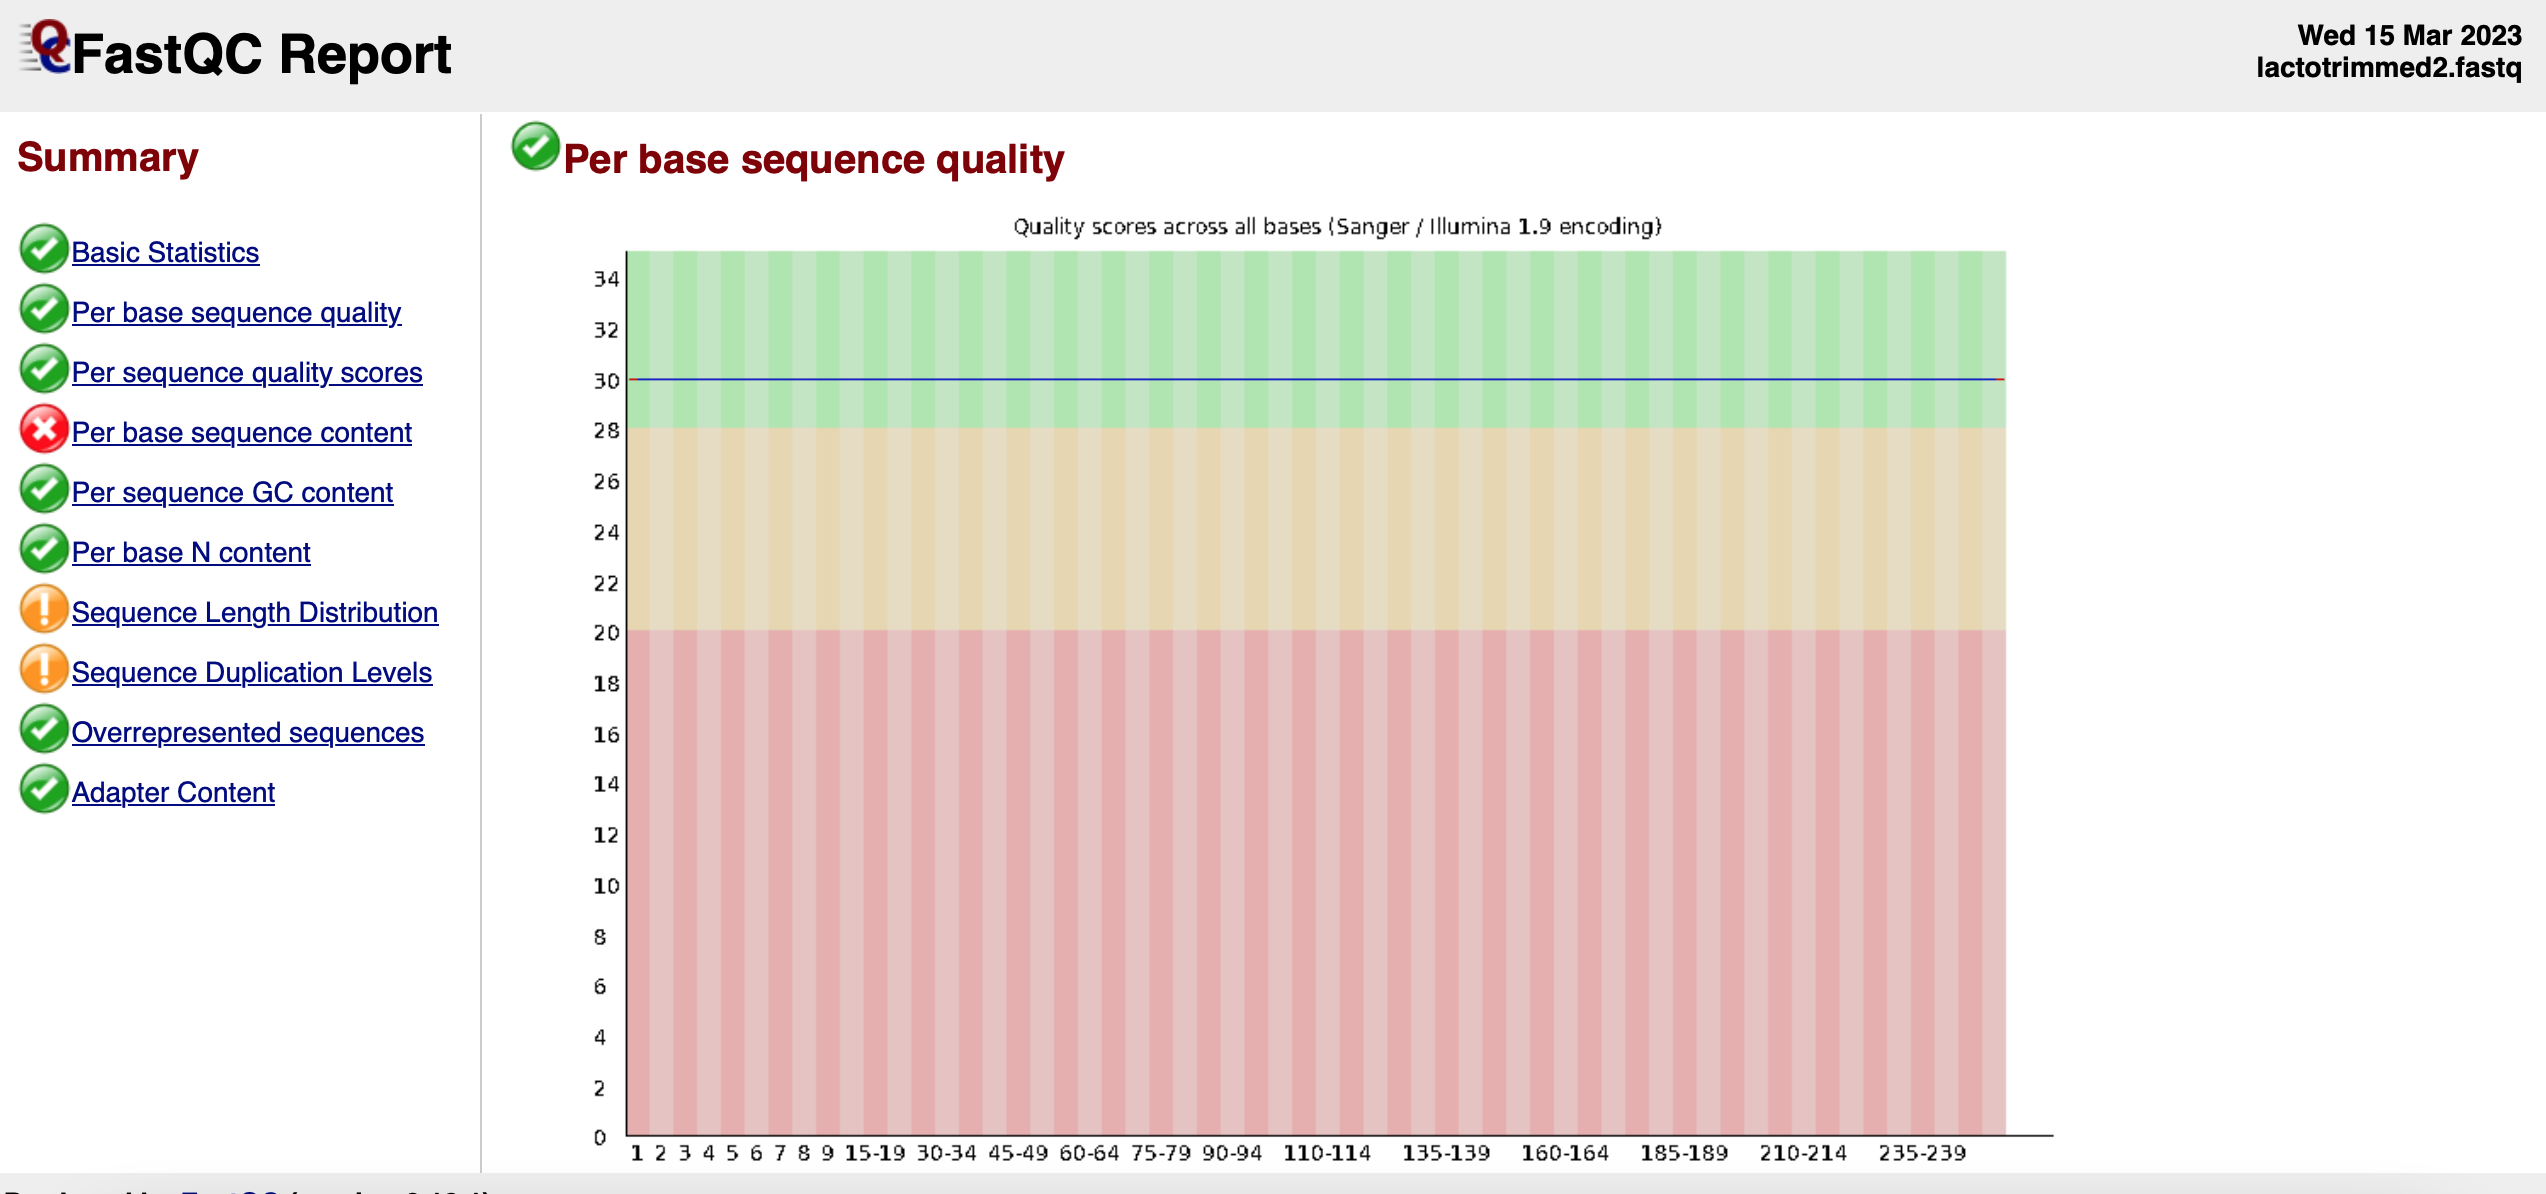

In [ ]:
#Assembly
%%bash
#ABySS assembly, se realizó un slurm para correrlo en apolo, a continuación solo se pondrá la línea de código y un pantallazo del slurm. 
#Se escogieron 3 kmers diferentes para ver como impactaban la calidad del ensamblaje resultante. 

Slurm
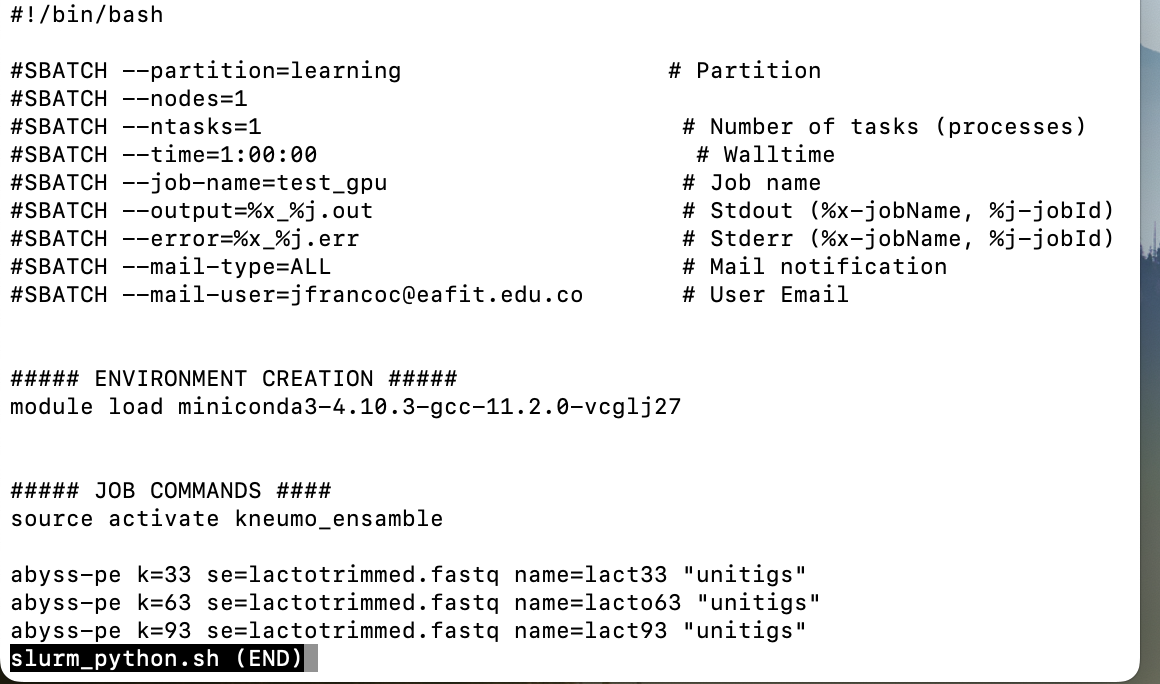

In [ ]:
#Abyss Kmer = 33
abyss-pe k=33 se=lactotrimmed.fastq name=lact33 "unitigs" 
#Para ver las características del resultado
abyss-fac lact33-unitigs.fa

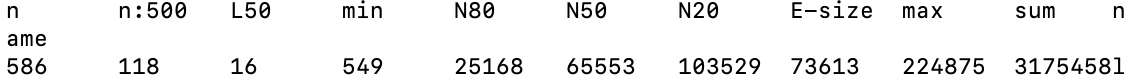

In [ ]:
#Abyss Kmer = 63
abyss-pe k=63 se=lactotrimmed.fastq name=lacto63 "unitigs"
#Para ver las características del resultado
abyss-fac lact63-unitigs.fa

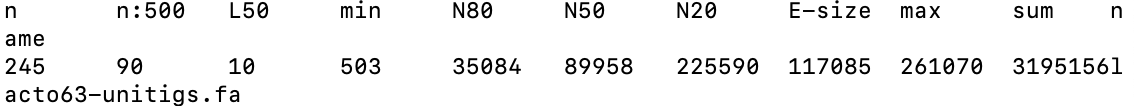

In [ ]:
#Abyss Kmer = 93
abyss-pe k=93 se=lactotrimmed.fastq name=lact93 "unitigs"
#Para ver las características del resultado
abyss-fac lact93-unitigs.fa

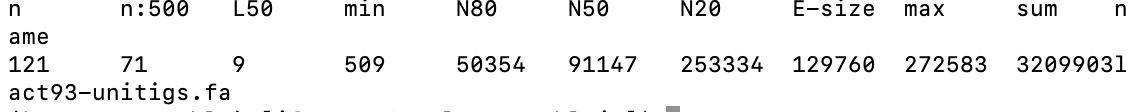

In [ ]:
#Abyss Kmer = 140
abyss-pe k=140 se=lactotrimmed.fastq name=lact140 "unitigs"
#Para ver las características del resultado
abyss-fac lact140-unitigs.fa

Se compararon los ensamblajes realizados con el realizado por los autores del proyecto: 
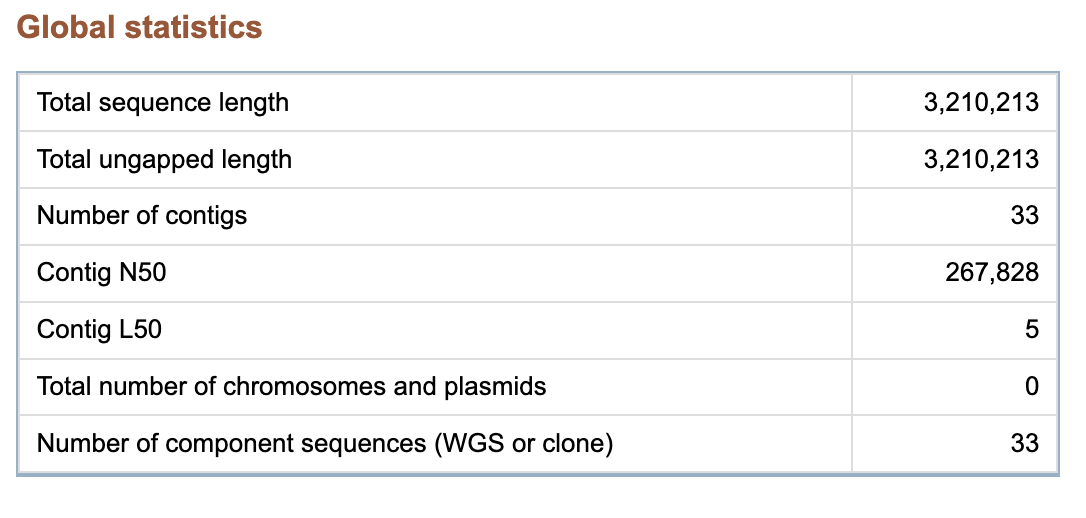

https://www.ncbi.nlm.nih.gov/assembly/GCA_028462545.1 

Se concluye que a mayor kmer, mejor es la calidad del ensamblaje (menor número de L50), ya que el número L50 del ensamblaje oficial (5) está más cerca a los valores kmers más altos probados (93 y 63). Es posible que si se realizarán ensayos con kmers más altos (ej: 100 o 133), se obtuvieran resultados similares al original/oficial (el de NCBI). 